In [1]:
import os
import sys
import shutil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
fig_plots = []

In [6]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [7]:
%run ../dataframes/provinces_gdf.ipynb -i
provinces_gdf = pd.read_pickle("{}/provinces_gdf.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/asl.ipynb -i
df_asl = pd.read_pickle("{}/df_asl.pkl".format(dataframes_path))

In [9]:
%run ../dataframes/dism_first_access.ipynb -i
df_dism_first_access = pd.read_pickle("{}/df_dism_first_access.pkl".format(dataframes_path))

In [10]:
%run ../datasets/dism_provincia_mapper.ipynb -i

In [11]:
newcmp = LinearSegmentedColormap.from_list("", ["#a3b18a", "#588157","#3a5a40"])

In [12]:
### Constants
OUTPUT_DIR = "output"
TARGET_GROUP = "Depressione"
TARGET_GROUP_TEXT = "Depressione"
YEAR = "2022"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [14]:
REGION_COLOURS = {
    "Nord": "#344e41", 
    "Centro": "#588157",
    "Sud e Isole": "#dad7cd",
}

In [15]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

In [16]:
folder = OUTPUT_DIR
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# prepare dataframe

In [17]:
df = df_dism_first_access.loc[df_dism_first_access["gruppo_diagnostico"] == TARGET_GROUP, [
    "codice_asl", 
    "descrizione_regione",
    "sesso",
    "numero_accessi",
    "asl"
]]

In [18]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,asl
4,203,PIEMONTE,Maschio,1606,to3
15,203,PIEMONTE,Femmina,3129,to3
26,204,PIEMONTE,Maschio,1557,to4
37,204,PIEMONTE,Femmina,2785,to4
48,205,PIEMONTE,Maschio,549,to5
...,...,...,...,...,...
2865,305,SARDEGNA,Femmina,344,asl n. 5 di oristano
2875,306,SARDEGNA,Maschio,70,asl n. 6 del medio campidano
2884,306,SARDEGNA,Femmina,128,asl n. 6 del medio campidano
2894,308,SARDEGNA,Maschio,604,asl n. 8 di cagliari


In [19]:
df_asl

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva,denominazione_azienda_compatibile
0,2010,10,PIEMONTE,201,to1,VIA S.SECONDO 29,10128,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
1,2010,10,PIEMONTE,202,to2,CORSO SVIZZERA 164,10149,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
2,2010,10,PIEMONTE,203,to3,VIA MARTIRI XXX APRILE 30,10093,COLLEGNO,TO,NaN,NaN,NaN,NaN,NaN,to3
3,2010,10,PIEMONTE,204,to4,Via Po 11,10034,CHIVASSO,TO,NaN,NaN,NaN,NaN,NaN,to4
4,2010,10,PIEMONTE,205,to5,VIA SAN DOMENICO 21,10023,CHIERI,TO,NaN,NaN,NaN,NaN,NaN,to5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2024,200,SARDEGNA,304,asl n. 4 dell'ogliastra,VIA PISCINAS 1,8045,LANUSEI,NU,NaN,NaN,direzione.generale@aslogliastra.it,www.aslogliastra.it,1.620421e+09,asl n. 4 dell'ogliastra
1802,2024,200,SARDEGNA,305,asl n. 5 di oristano,VIA CARDUCCI 35,9170,ORISTANO,OR,NaN,NaN,direzione.generale@asloristano.it,nuovo.asloristano.it/a,1.258181e+09,asl n. 5 di oristano
1803,2024,200,SARDEGNA,306,asl n. 6 del medio campidano,VIA GIUSEPPE UNGARETTI 9,9025,SANLURI,SU,07093841,07093841,direzione.generale@aslmediocampidano.it,www.aslmediocampidano.it,3.990321e+09,asl n. 6 del medio campidano
1804,2024,200,SARDEGNA,307,asl n. 7 del sulcis,VIA DALMAZIA 83,9013,CARBONIA,SU,07816681,07816681,direzione.generale@aslsulcis.it,www.aslsulcis.it,3.990311e+09,asl n. 7 del sulcis


In [20]:
df_asl.loc[(df_asl["comune"] == "LIVORNO"), ]

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva,denominazione_azienda_compatibile
79,2010,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest
225,2011,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest
370,2012,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest
515,2013,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest
655,2014,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest
794,2015,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN,azienda usl toscana nord-ovest


In [21]:
df_asl = df_asl[["anno", "comune", "codice_azienda", "sigla_provincia", "denominazione_azienda_compatibile"]]

In [22]:
df_asl = df_asl.groupby(['denominazione_azienda_compatibile', "comune", "sigla_provincia"])['anno'].max().reset_index()

In [23]:
df_asl

,denominazione_azienda_compatibile,comune,sigla_provincia,anno
0,a.s.l. avellino,AVELLINO,AV,2024
1,a.s.l. benevento,BENEVENTO,BN,2024
2,a.s.l. caserta,CASERTA,CE,2024
3,a.s.l. della provincia di brescia,BRESCIA,BS,2015
4,a.s.l. della provincia di como,COMO,CO,2015
...,...,...,...,...
195,to5,CHIERI,TO,2024
196,trento,TRENTO,TN,2024
197,vc,VERCELLI,VC,2024
198,vco,OMEGNA,VB,2024


In [24]:
df_asl.loc[(df_asl["comune"] == "LIVORNO"), ]

,denominazione_azienda_compatibile,comune,sigla_provincia,anno
124,azienda usl toscana nord-ovest,LIVORNO,LI,2015


In [25]:
provinces_gdf = provinces_gdf[["prov_acr", "geometry", "zone", "prov_name"]]

In [26]:
df_incompatible_names = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"), how="right").reset_index()

In [27]:
missing_asl_mask = df_incompatible_names.numero_accessi.isna()

In [28]:
df_incompatible_names.loc[missing_asl_mask, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
6,a.s.l. della provincia di brescia,NaN,NaN,NaN,NaN,BRESCIA,BS,2015
7,a.s.l. della provincia di como,NaN,NaN,NaN,NaN,COMO,CO,2015
8,a.s.l. della provincia di cremona,NaN,NaN,NaN,NaN,CREMONA,CR,2015
9,a.s.l. della provincia di lecco,NaN,NaN,NaN,NaN,LECCO,LC,2015
10,a.s.l. della provincia di lodi,NaN,NaN,NaN,NaN,LODI,LO,2015
...,...,...,...,...,...,...,...,...
297,rm/g,NaN,NaN,NaN,NaN,TIVOLI,RM,2015
298,rm/h,NaN,NaN,NaN,NaN,ALBANO LAZIALE,RM,2015
311,rovigo,NaN,NaN,NaN,NaN,ROVIGO,RO,2016
312,s. dona' di piave,NaN,NaN,NaN,NaN,SAN DONA' DI PIAVE,VE,2016


In [29]:
df = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"))

In [30]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
to3,203,PIEMONTE,Maschio,1606,COLLEGNO,TO,2024.0
to3,203,PIEMONTE,Femmina,3129,COLLEGNO,TO,2024.0
to4,204,PIEMONTE,Maschio,1557,CHIVASSO,TO,2024.0
to4,204,PIEMONTE,Femmina,2785,CHIVASSO,TO,2024.0
to5,205,PIEMONTE,Maschio,549,CHIERI,TO,2024.0
...,...,...,...,...,...,...,...
asl n. 6 del medio campidano,306,SARDEGNA,Femmina,128,SANLURI,SU,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,CAGLIARI,CA,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,SELARGIUS,CA,2022.0


In [31]:
df.loc[(df["sigla_provincia"] == "VC"), ]

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
vc,206,PIEMONTE,Maschio,313,VERCELLI,VC,2024.0
vc,206,PIEMONTE,Femmina,733,VERCELLI,VC,2024.0


In [32]:
df = df.reset_index()

In [33]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [34]:
df.loc[missing_mask_sigla_provincia,]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
46,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Maschio,1737,NaN,NaN,NaN
47,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Femmina,3370,NaN,NaN,NaN
48,asst santi paolo e carlo,702,LOMBARDIA,Maschio,2922,NaN,NaN,NaN
49,asst santi paolo e carlo,702,LOMBARDIA,Femmina,5332,NaN,NaN,NaN
50,asst fatebenefratelli sacco,703,LOMBARDIA,Maschio,1998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
130,az.osp.universitaria integrata verona,912,VENETO,Femmina,31,NaN,NaN,NaN
195,azienda ospedaliero-universitaria pisana,901,TOSCANA,Maschio,4,NaN,NaN,NaN
196,azienda ospedaliero-universitaria pisana,901,TOSCANA,Femmina,7,NaN,NaN,NaN
197,azienda ospedaliera universitaria senese,902,TOSCANA,Maschio,8,NaN,NaN,NaN


In [35]:
df.loc[missing_mask_sigla_provincia, 'sigla_provincia'] = df.loc[missing_mask_sigla_provincia, 'asl'].str.lower().map(dism_provincia_map)


In [36]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [37]:
df.loc[missing_mask_sigla_provincia, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno


In [38]:
df.loc[df["descrizione_regione"] == "TOSCANA", ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
169,azienda usl toscana centro,201,TOSCANA,Maschio,8554,EMPOLI,FI,2015.0
170,azienda usl toscana centro,201,TOSCANA,Maschio,8554,FIRENZE,FI,2024.0
171,azienda usl toscana centro,201,TOSCANA,Maschio,8554,PISTOIA,PT,2015.0
172,azienda usl toscana centro,201,TOSCANA,Maschio,8554,PRATO,PO,2015.0
173,azienda usl toscana centro,201,TOSCANA,Femmina,12570,EMPOLI,FI,2015.0
174,azienda usl toscana centro,201,TOSCANA,Femmina,12570,FIRENZE,FI,2024.0
175,azienda usl toscana centro,201,TOSCANA,Femmina,12570,PISTOIA,PT,2015.0
176,azienda usl toscana centro,201,TOSCANA,Femmina,12570,PRATO,PO,2015.0
177,azienda usl toscana nord-ovest,202,TOSCANA,Maschio,4589,CAMAIORE,LU,2015.0
178,azienda usl toscana nord-ovest,202,TOSCANA,Maschio,4589,CARRARA,MS,2015.0


In [39]:
assert df.loc[df["descrizione_regione"] == "LAZIO", ]['numero_accessi'].sum() == 60001

In [40]:
assert df.loc[df["descrizione_regione"] == "CALABRIA", ]['numero_accessi'].sum() == 18221

In [41]:
assert df.loc[df["descrizione_regione"] == "LOMBARDIA", ]['numero_accessi'].sum() == 136045

In [42]:
df_dism_agg = df.reset_index()[["asl", "sigla_provincia"]].pivot_table(
    index='sigla_provincia',
    aggfunc='count',
)

In [43]:
df_dism_agg

,asl
sigla_provincia,
AG,2
AL,4
AN,10
AO,2
AQ,2
...,...
VE,4
VI,6
VR,4


In [44]:
df_dism_agg = df_dism_agg.rename(columns={
    "asl": "dism_count",
})

In [45]:
df_dism_agg.filter(items=['LI'], axis=0)

,dism_count
LI,2


In [46]:
df = df.reset_index()

In [47]:
df = df.pivot_table(
    index='sigla_provincia',
    aggfunc='sum',
    values='numero_accessi'
)

In [48]:
df

,numero_accessi
sigla_provincia,
AG,2991
AL,4804
AN,11041
AO,1524
AQ,3358
...,...
VE,11235
VI,10219
VR,6809


In [49]:
df = df.join(df_dism_agg)

In [50]:
df = df.assign(target_group_avg=lambda df_: df_.numero_accessi / df_.dism_count)

In [51]:
df

,numero_accessi,dism_count,target_group_avg
sigla_provincia,,,
AG,2991,2,1495.500000
AL,4804,4,1201.000000
AN,11041,10,1104.100000
AO,1524,2,762.000000
AQ,3358,2,1679.000000
...,...,...,...
VE,11235,4,2808.750000
VI,10219,6,1703.166667
VR,6809,4,1702.250000


In [52]:
df.loc["MI"]

numero_accessi      43057.000000
dism_count             19.000000
target_group_avg     2266.157895
Name: MI, dtype: float64

In [53]:
df = provinces_gdf.set_index("prov_acr").join(df)

In [54]:
df

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,19741.0,8.0,2467.625
VC,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",Nord,Vercelli,1046.0,2.0,523.000
NO,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",Nord,Novara,2926.0,2.0,1463.000
CN,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",Nord,Cuneo,6049.0,4.0,1512.250
AT,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",Nord,Asti,2000.0,2.0,1000.000
...,...,...,...,...,...,...
SS,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",Sud e Isole,Sassari,440.0,2.0,220.000
NU,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",Sud e Isole,Nuoro,681.0,4.0,170.250
CA,"MULTIPOLYGON (((8.84872 39.09924, 8.84697 39.1...",Sud e Isole,Cagliari,3926.0,4.0,981.500


In [55]:
plot_title = "Totale accessi con diagnosi '{}'\n per DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

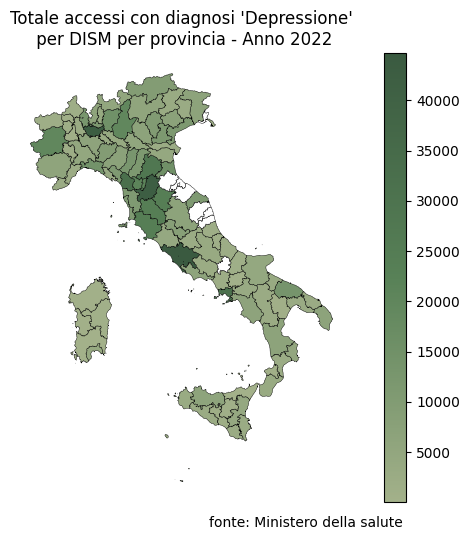

In [56]:
df_plot = df.plot(
    column="numero_accessi",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

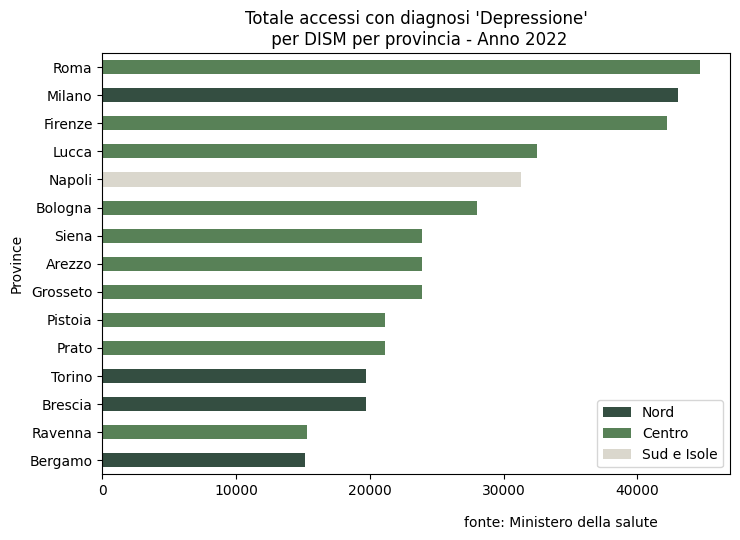

In [57]:
best_rows = df.sort_values(by=['numero_accessi'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['numero_accessi'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    y="numero_accessi",
    x="prov_name",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [58]:
best_rows

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
RM,"MULTIPOLYGON (((11.82281 42.14649, 11.82464 42...",Centro,Roma,44690.0,12.0,3724.166667
MI,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3...",Nord,Milano,43057.0,19.0,2266.157895
FI,"POLYGON ((11.20242 44.10074, 11.20259 44.10067...",Centro,Firenze,42248.0,4.0,10562.000000
LU,"POLYGON ((10.70536 43.84269, 10.70666 43.84232...",Centro,Lucca,32511.0,6.0,5418.500000
NA,"MULTIPOLYGON (((14.35567 41.00178, 14.35628 41...",Sud e Isole,Napoli,31277.0,10.0,3127.700000
BO,"POLYGON ((11.13161 44.56743, 11.12953 44.56816...",Centro,Bologna,27985.0,4.0,6996.250000
SI,"POLYGON ((11.63621 42.85846, 11.63584 42.85861...",Centro,Siena,23923.0,4.0,5980.750000
GR,"MULTIPOLYGON (((11.52167 42.43414, 11.52159 42...",Centro,Grosseto,23903.0,2.0,11951.500000
AR,"MULTIPOLYGON (((12.10273 43.52993, 12.09576 43...",Centro,Arezzo,23903.0,2.0,11951.500000


In [59]:
plot_title = "Media accessi con diagnosi '{}'\n per DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

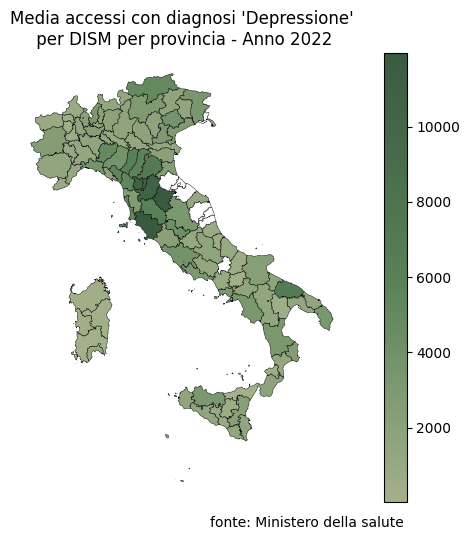

In [60]:
df_plot = df.plot(
    column="target_group_avg",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

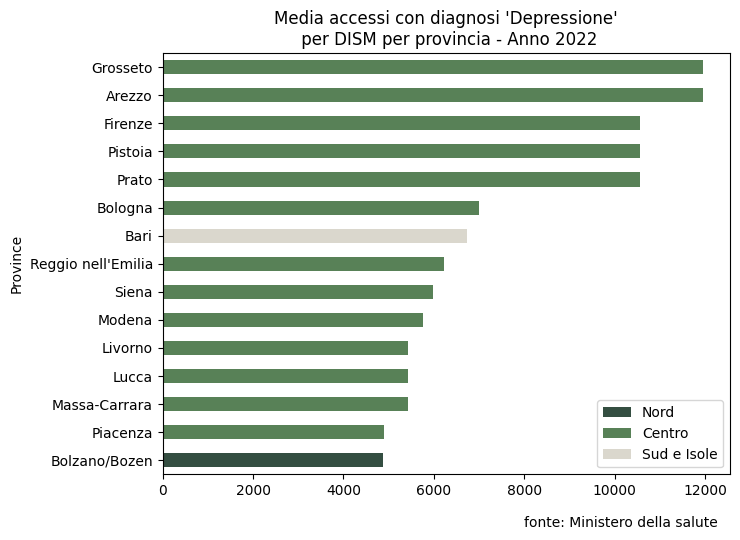

In [61]:
best_rows = df.sort_values(by=['target_group_avg'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['target_group_avg'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="target_group_avg",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [62]:
plot_title = "Numero di DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

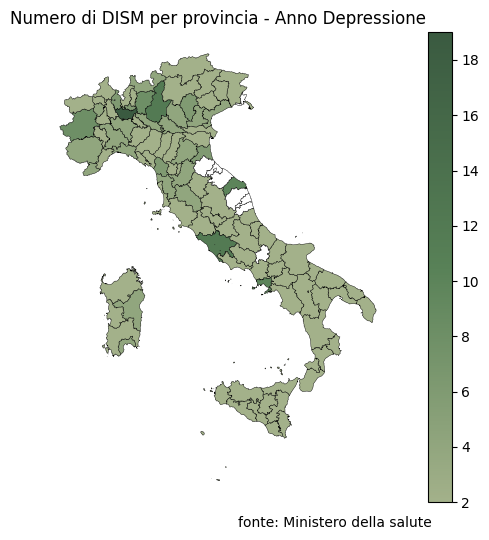

In [63]:
df_plot = df.plot(
    column="dism_count",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

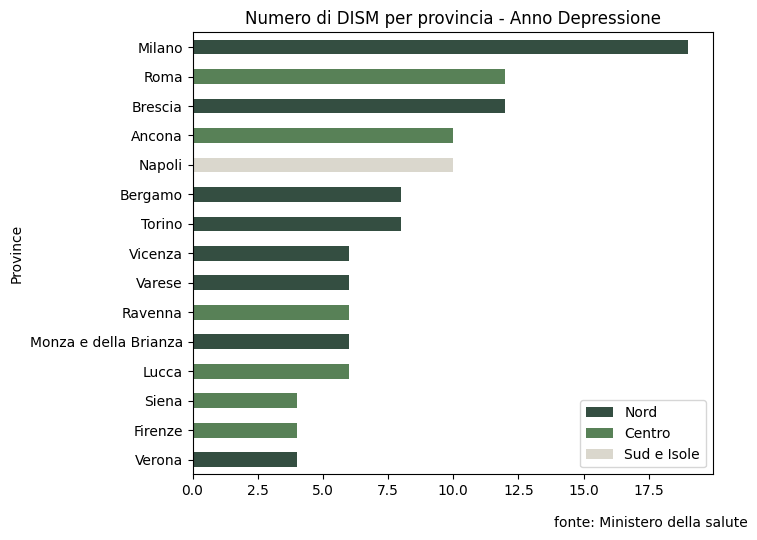

In [64]:
best_rows = df.sort_values(by=['dism_count'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['dism_count'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="dism_count",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [65]:
for i, fig_plot in enumerate(fig_plots, start=1):
    df_ = fig_plot.get("df")
    df_name = fig_plot.get("name")
    file_name = "{}/{}_{}.png".format(OUTPUT_DIR, i, df_name)
    df_.get_figure().savefig(file_name)